# Exploratory Data Analysis on Movielens dataset

In [433]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data

In [434]:
DATA_FOLDER = Path('data/movielens')
MOVIES_FILEPATH = DATA_FOLDER / 'movies_metadata.csv'
RATINGS_FILEPATH = DATA_FOLDER / 'ratings.csv'
CREDITS_FILEPATH = DATA_FOLDER / 'credits.csv'
KEYWORDS_FILEPATH = DATA_FOLDER / 'keywords.csv'

In [435]:
movies = pd.read_csv(MOVIES_FILEPATH)
movies.head()

/Users/akshayaravi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [436]:
movies.shape

(45466, 24)

In [437]:
ratings = pd.read_csv(RATINGS_FILEPATH)
ratings.head()

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [438]:
credits = pd.read_csv(CREDITS_FILEPATH)
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [439]:
keywords = pd.read_csv(KEYWORDS_FILEPATH)
keywords.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [440]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

## Preprocessing

### Retaining originals

In [441]:
df_movies = movies.copy()
df_credits = credits.copy()
df_ratings = ratings.copy()
df_links = links.copy()
df_keywords = keywords.copy()

### Removing erroneous values

In [442]:
df_movies = df_movies.drop(df_movies[df_movies.id == '1997-08-20'].index)
df_movies = df_movies.drop(df_movies[df_movies.id == '2012-09-29'].index)
df_movies = df_movies.drop(df_movies[df_movies.id == '2014-01-01'].index)

### Maintaining uniformity in  column value types 

In [443]:
df_movies.id = df_movies.id.astype(int) 
df_credits.id = df_credits.id.astype(int) 
df_movies.popularity = df_movies.popularity.astype(float) 


### Merging dataframes by id

#### movies and credits

In [444]:

merged_movie_data = df_movies.merge(df_credits, on='id', how='inner')

#### merging keywords

In [445]:
merged_movie_data=merged_movie_data.merge(keywords, on='id')

### Check na 

In [446]:
merged_movie_data.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
cast                         0
crew                         0
keywords                     0
dtype: int64

In [447]:
merged_movie_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

### drop unused columns

In [448]:
merged_movie_data.drop(columns=['adult','belongs_to_collection','homepage','original_title', 'overview',  'poster_path', 'status', 'tagline', 'video'],inplace=True)

### Methods to get top name values from json columns

In [449]:
from ast import literal_eval
import ast

In [450]:
def get_values(data_str,crew=False):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                if crew:
                    if k_v['job'] == 'Director':
                        values.append(k_v['name'])
                else:
                    values.append(k_v['name'])
            # all values
            #return ','.join(values)
            # top one value
            return values
        else:
            return None

In [451]:
def get_values_from_df(dataframe,columnnames):
    crew=False
    for i in columnnames:
        if i == 'crew':
            crew = True
            dataframe[i] = dataframe[i].apply(get_values,crew=True)
        else :
            dataframe[i] = dataframe[i].apply(get_values)
        # top one value
        dataframe[i+"val"] = dataframe[i].str[0]
        dataframe.drop([i], axis = 1,inplace=True)
        
    return dataframe
    

#### Retaining only top values from columns

In [452]:
merged_movie_data= get_values_from_df(merged_movie_data,['genres','production_companies', 'production_countries', 'spoken_languages','cast','crew','keywords'])

In [453]:
# top one value
merged_movie_data

budget      id    imdb_id original_language  popularity release_date  \
0      30000000     862  tt0114709                en   21.946943   1995-10-30   
1      65000000    8844  tt0113497                en   17.015539   1995-12-15   
2             0   15602  tt0113228                en   11.712900   1995-12-22   
3      16000000   31357  tt0114885                en    3.859495   1995-12-22   
4             0   11862  tt0113041                en    8.387519   1995-02-10   
...         ...     ...        ...               ...         ...          ...   
46623         0  439050  tt6209470                fa    0.072051          NaN   
46624         0  111109  tt2028550                tl    0.178241   2011-11-17   
46625         0   67758  tt0303758                en    0.903007   2003-08-01   
46626         0  227506  tt0008536                en    0.003503   1917-10-21   
46627         0  461257  tt6980792                en    0.163015   2017-06-09   

           revenue  runtime                        title  vote_average  \
0      373554033.0     81.0                    Toy Story           7.7   
1      262797249.0    104.0                      Jumanji           6.9   
2              0.0    101.0             Grumpier Old Men           6.5   
3       81452156.0    127.0            Waiting to Exhale           6.1   
4       76578911.0    106.0  Father of the Bride Part II           5.7   
...            ...      ...                          ...           ...   
46623          0.0     90.0                       Subdue           4.0   
46624          0.0    360.0          Century of Birthing           9.0   
46625          0.0     90.0                     Betrayal           3.8   
46626          0.0     87.0             Satan Triumphant           0.0   
46627          0.0     75.0                     Queerama           0.0   

       vote_count  genresval                 production_companiesval  \
0          5415.0  Animation                 Pixar Animation Studios   
1          2413.0  Adventure                        TriStar Pictures   
2            92.0    Romance                            Warner Bros.   
3            34.0     Comedy  Twentieth Century Fox Film Corporation   
4           173.0     Comedy                   Sandollar Productions   
...           ...        ...                                     ...   
46623         1.0      Drama                                     NaN   
46624         3.0      Drama                             Sine Olivia   
46625         6.0     Action                 American World Pictures   
46626         0.0        NaN                               Yermoliev   
46627         0.0        NaN                                     NaN   

        production_countriesval spoken_languagesval           castval  \
0      United States of America             English         Tom Hanks   
1      United States of America             English    Robin Williams   
2      United States of America             English    Walter Matthau   
3      United States of America             English   Whitney Houston   
4      United States of America             English      Steve Martin   
...                         ...                 ...               ...   
46623                      Iran               فارسی      Leila Hatami   
46624               Philippines                          Angel Aquino   
46625  United States of America             English     Erika Eleniak   
46626                    Russia                 NaN  Iwan Mosschuchin   
46627            United Kingdom             English               NaN   

                crewval     keywordsval  
0         John Lasseter        jealousy  
1          Joe Johnston      board game  
2         Howard Deutch         fishing  
3       Forest Whitaker  based on novel  
4         Charles Shyer            baby  
...                 ...             ...  
46623  Hamid Nematollah     tragic love  
46624          Lav Diaz          artist  
46625    Mark L. Lester    

### Handling na values

In [454]:
merged_movie_data.isnull().sum()

budget                         0
id                             0
imdb_id                       17
original_language             11
popularity                     4
release_date                  88
revenue                        4
runtime                      268
title                          4
vote_average                   4
vote_count                     4
genresval                   2524
production_companiesval    12282
production_countriesval     6496
spoken_languagesval         3961
castval                     2491
crewval                      917
keywordsval                14889
dtype: int64

In [455]:
merged_movie_data.dropna(inplace=True)

### Handling Date column

In [456]:
merged_movie_data["release_year"]=merged_movie_data["release_date"].apply(lambda x : int(str(x).split("-")[0]))

In [457]:
merged_movie_data['release_date'] = pd.to_datetime(merged_movie_data['release_date'], format = '%Y-%m-%d', errors='coerce')

### Budget,revenue and profit

In [458]:
merged_movie_data['budget'] = merged_movie_data['budget'].astype(int)
merged_movie_data['revenue'] = merged_movie_data['revenue'].astype(int)
merged_movie_data['profit'] = merged_movie_data['revenue'] - merged_movie_data['budget']
merged_movie_data['profit'] = merged_movie_data['profit'].fillna(0)

In [459]:
merged_movie_data.isnull().sum()

budget                     0
id                         0
imdb_id                    0
original_language          0
popularity                 0
release_date               0
revenue                    0
runtime                    0
title                      0
vote_average               0
vote_count                 0
genresval                  0
production_companiesval    0
production_countriesval    0
spoken_languagesval        0
castval                    0
crewval                    0
keywordsval                0
release_year               0
profit                     0
dtype: int64

In [460]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Final dataframes

In [461]:
merged_movie_data

budget      id    imdb_id original_language  popularity release_date  \
0      30000000     862  tt0114709                en   21.946943   1995-10-30   
1      65000000    8844  tt0113497                en   17.015539   1995-12-15   
2             0   15602  tt0113228                en   11.712900   1995-12-22   
3      16000000   31357  tt0114885                en    3.859495   1995-12-22   
4             0   11862  tt0113041                en    8.387519   1995-02-10   
...         ...     ...        ...               ...         ...          ...   
46613         0  106807  tt0135571                fr    0.225432   1900-01-01   
46615         0  404604  tt5690142                hi    1.559596   2017-07-07   
46618         0   84419  tt0038621                en    0.222814   1946-03-29   
46620         0  289923  tt0252966                en    0.386450   2000-10-03   
46624         0  111109  tt2028550                tl    0.178241   2011-11-17   

         revenue  runtime                             title  vote_average  \
0      373554033     81.0                         Toy Story           7.7   
1      262797249    104.0                           Jumanji           6.9   
2              0    101.0                  Grumpier Old Men           6.5   
3       81452156    127.0                 Waiting to Exhale           6.1   
4       76578911    106.0       Father of the Bride Part II           5.7   
...          ...      ...                               ...           ...   
46613          0      2.0  The Fat and Lean Wrestling Match           6.5   
46615          0    146.0                               Mom           6.6   
46618          0     65.0                  House of Horrors           6.3   
46620          0     30.0               The Burkittsville 7           7.0   
46624          0    360.0               Century of Birthing           9.0   

       vote_count  genresval                 production_companiesval  \
0          5415.0  Animation                 Pixar Animation Studios   
1          2413.0  Adventure                        TriStar Pictures   
2            92.0    Romance                            Warner Bros.   
3            34.0     Comedy  Twentieth Century Fox Film Corporation   
4           173.0     Comedy                   Sandollar Productions   
...           ...        ...                                     ...   
46613         6.0     Comedy                               Star-Film   
46615        14.0      Crime                               Mad Films   
46618         8.0     Horror                      Universal Pictures   
46620         1.0     Horror             Neptune Salad Entertainment   
46624         3.0      Drama                             Sine Olivia   

        production_countriesval spoken_languagesval          castval  \
0      United States of America             English        Tom Hanks   
1      United States of America             English   Robin Williams   
2      United States of America             English   Walter Matthau   
3      United States of America             English  Whitney Houston   
4      United States of America             English     Steve Martin   
...                         ...                 ...              ...   
46613                    France         No Language    Jeanne d'Alcy   
46615                     India              हिन्दी   Sridevi Kapoor   
46618  United States of America             English     Rondo Hatton   
46620  United States of America             English       Monty Bane   
46624               Philippines                         Angel Aquino   

               crewval     keywordsval  release_year     profit  
0        John Lasseter        jealousy          1995  343554033  
1         Joe Johnston      board game          1995  197797249  
2        Howard Deutch         fishing          1995          0  
3      Forest Whitaker  based on novel          1995   65452156  
4        Charles Shyer            baby          199

In [462]:
df_ratings

userId  movieId  rating   timestamp
0              1      110     1.0  1425941529
1              1      147     4.5  1425942435
2              1      858     5.0  1425941523
3              1     1221     5.0  1425941546
4              1     1246     5.0  1425941556
...          ...      ...     ...         ...
26024284  270896    58559     5.0  1257031564
26024285  270896    60069     5.0  1257032032
26024286  270896    63082     4.5  1257031764
26024287  270896    64957     4.5  1257033990
26024288  270896    71878     2.0  1257031858

[26024289 rows x 4 columns]

## EDA

## Movies

#### Top genres based on movie count

In [463]:
num_gen = pd.DataFrame(merged_movie_data['genresval'].value_counts()).reset_index()
num_gen.columns = ['genre', 'movies']
num_gen.head(10)

genre  movies
0        Drama    7254
1       Comedy    5139
2       Action    3166
3       Horror    1795
4        Crime    1255
5    Adventure    1160
6     Thriller    1009
7  Documentary     896
8      Romance     692
9    Animation     593

#### Top languages based on movie count

In [464]:
num_gen = pd.DataFrame(merged_movie_data['spoken_languagesval'].value_counts()).reset_index()
num_gen.columns = ['language', 'movies_count']
num_gen.head(10)

language  movies_count
0    English         18365
1   Français          1299
2        日本語           799
3    Deutsch           707
4   Italiano           659
5    Español           616
6    Pусский           262
7     हिन्दी           238
8  广州话 / 廣州話           209
9        普通话           206

#### Top Voted Movies based on vote_average with genre values

In [465]:
merged_movie_data[['title', 'vote_average', 'genresval']].sort_values('vote_average', ascending=False).head(10)

title  vote_average        genresval
21614                   Criminal Justice          10.0         TV Movie
30498                      Backyard Dogs          10.0           Action
35558         Elaine Stritch: At Liberty          10.0           Comedy
35232                        Cattle Town          10.0          Western
34511                    Mera Naam Joker          10.0            Drama
34327                    Great Transport          10.0              War
32650                          Butterfly          10.0  Science Fiction
31043  Mortal Kombat: The Journey Begins          10.0           Action
43899            Nick Swardson: Taste It          10.0           Comedy
25855                     Fearless Fagan          10.0           Comedy

#### Top Voted Movies based on vote_count with genre values

In [466]:
merged_movie_data[['title', 'vote_count', 'genresval']].sort_values('vote_count', ascending=False).head(10)

title  vote_count        genresval
15651                Inception     14075.0           Action
12589          The Dark Knight     12269.0            Drama
14723                   Avatar     12114.0           Action
18008             The Avengers     12000.0  Science Fiction
26779                 Deadpool     11444.0           Action
23076             Interstellar     11187.0        Adventure
20254         Django Unchained     10297.0            Drama
23948  Guardians of the Galaxy     10014.0           Action
2870                Fight Club      9678.0            Drama
18434         The Hunger Games      9634.0  Science Fiction

#### Number of Movies released Year Wise 

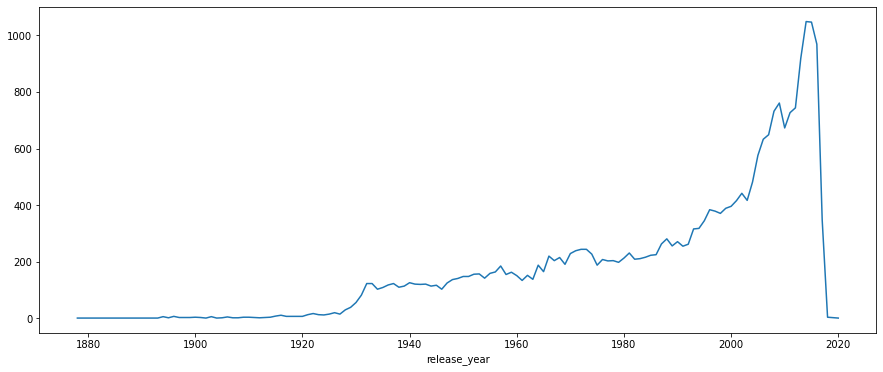

In [467]:
year_count = merged_movie_data.groupby('release_year')['title'].count()
plt.figure(figsize=(15,6))
year_count.plot()

#### Vote average value distribution

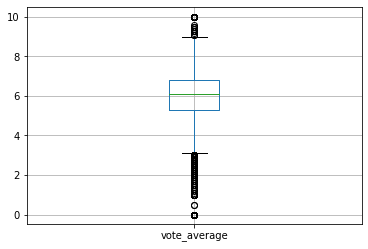

In [468]:
merged_movie_data.boxplot(column=['vote_average'])

#### Vote average distribution top 100 popular movies

In [469]:
u=merged_movie_data[['vote_average','popularity']].sort_values('popularity',ascending=False).head(100)

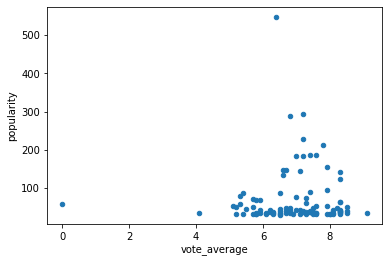

In [470]:
u.plot.scatter(x='vote_average',y='popularity')

#### Budget spent on top 100 popular movies

In [471]:
budgetvspopularity=merged_movie_data[merged_movie_data['budget']> 0][['budget','popularity']].sort_values('budget',ascending=False).head(100)

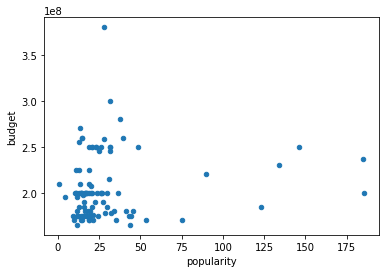

In [472]:
budgetvspopularity.plot.scatter(x='popularity',y='budget')

#### Shortest Movies

In [473]:
merged_movie_data[merged_movie_data['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)

runtime                                         title  release_year
34072      1.0                     My Grandpa the Bankrobber          2011
43033      1.0                          Demolition of a Wall          1896
44720      1.0  The Pickaninny Dance from the “Passing Show”          1894
19434      1.0                                      The Kiss          1896
24011      1.0                 Tables Turned on the Gardener          1895
44673      1.0         The Execution of Mary, Queen of Scots          1895
43863      1.0                                 Buffalo Dance          1894
35152      1.0                    Sallie Gardner at a Gallop          1878
45813      1.0                            The Haunted Castle          1897
16441      1.0                             The Human Pyramid          1899

#### Longest Movies

In [474]:
merged_movie_data[merged_movie_data['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

runtime                                title  release_year
19348    874.0                              The War          2007
34882    840.0  The Roosevelts: An Intimate History          2014
44355    705.0                     Band of Brothers          2001
18819    680.0                        The Civil War          1990
31612    669.0                          I, Claudius          1976
40253    550.0                         Planet Earth          2006
27870    540.0                          The Pacific          2010
22849    470.0                      Generation Kill          2008
40401    463.0                O.J.: Made in America          2016
10119    450.0                           Satantango          1994

#### Expensive Movies

In [475]:
merged_movie_data[merged_movie_data['budget'].notnull()][['title', 'budget', 'revenue', 'profit', 'release_year']].sort_values('budget', ascending=False).head(10)

title     budget     revenue  \
17307   Pirates of the Caribbean: On Stranger Tides  380000000  1045713802   
11936      Pirates of the Caribbean: At World's End  300000000   961000000   
26773                       Avengers: Age of Ultron  280000000  1405403694   
11162                              Superman Returns  270000000   391081192   
16307                                       Tangled  260000000   591794936   
46005                 Transformers: The Last Knight  260000000   604942143   
18875                                   John Carter  260000000   284139100   
11889                                  Spider-Man 3  258000000   890871626   
21374                               The Lone Ranger  255000000    89289910   
16305  Harry Potter and the Deathly Hallows: Part 1  250000000   954305868   

           profit  release_year  
17307   665713802          2011  
11936   661000000          2007  
26773  1125403694          2015  
11162   121081192          2006  
16307   331794936          2010  
46005   344942143          2017  
18875    24139100          2012  
11889   632871626          2007  
21374  -165710090          2013  
16305   704305868          2010

#### Profitable Movies

In [476]:
merged_movie_data[['title', 'budget', 'revenue', 'profit', 'release_year']].sort_values('profit', ascending=False).head(10)

title     budget     revenue  \
14723                                        Avatar  237000000  2787965087   
26770                  Star Wars: The Force Awakens  245000000  2068223624   
1659                                        Titanic  200000000  1845034188   
25285                                Jurassic World  150000000  1513528810   
29044                                     Furious 7  190000000  1506249360   
18008                                  The Avengers  220000000  1519557910   
17627  Harry Potter and the Deathly Hallows: Part 2  125000000  1342000000   
26773                       Avengers: Age of Ultron  280000000  1405403694   
22308                                        Frozen  150000000  1274219009   
43388                          Beauty and the Beast  160000000  1262886337   

           profit  release_year  
14723  2550965087          2009  
26770  1823223624          2015  
1659   1645034188          1997  
25285  1363528810          2015  
29044  1316249360          2015  
18008  1299557910          2012  
17627  1217000000          2011  
26773  1125403694          2015  
22308  1124219009          2013  
43388  1102886337          2017

#### Top Production Countries 

In [477]:
s = merged_movie_data['production_countriesval']
s.name = 'countries'

In [478]:
con_df = merged_movie_data.drop('production_countriesval', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)

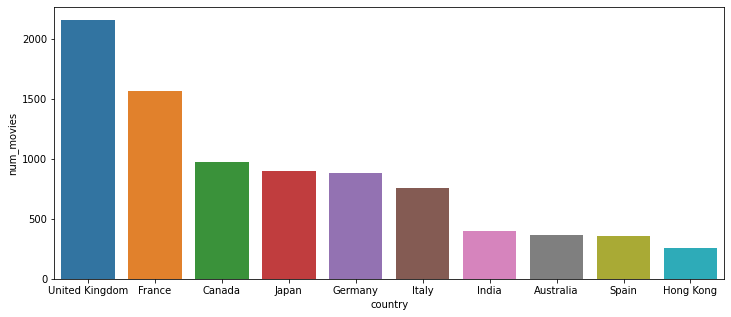

In [479]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(x='country', y='num_movies', data=con_df.iloc[1:11])
plt.show()

#### Most used Title words

In [480]:
from wordcloud import WordCloud, STOPWORDS

In [481]:
title_corpus = ' '.join(merged_movie_data['title'])

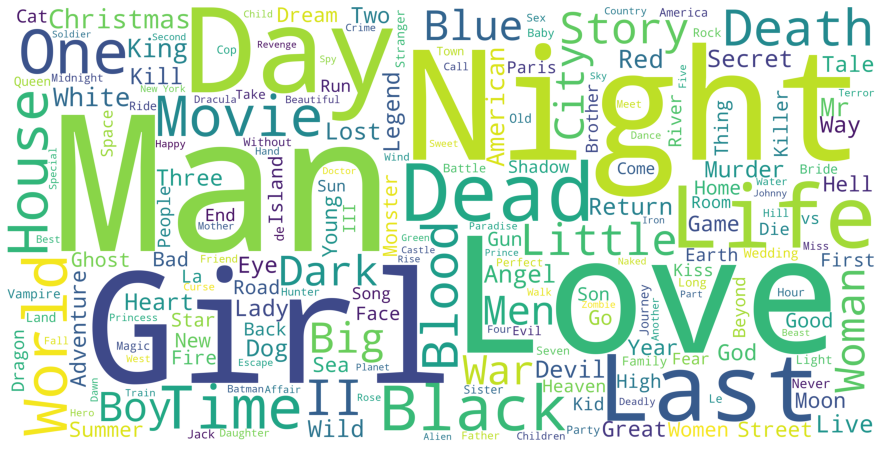

In [482]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Most common key words

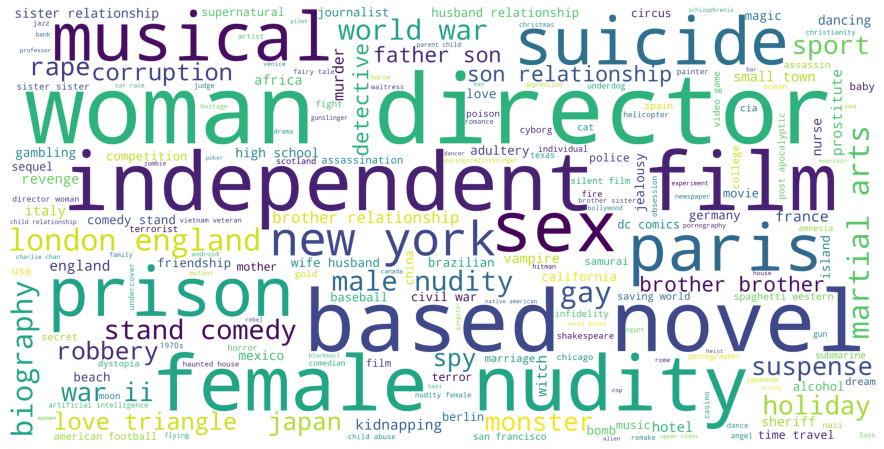

In [483]:
keyword_corpus = ' '.join(merged_movie_data['keywordsval'])
keyword_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(keyword_corpus)
plt.figure(figsize=(16,8))
plt.imshow(keyword_wordcloud)
plt.axis('off')
plt.show()

#### Comparing budget and runtime

In [484]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [485]:
fig = px.scatter(merged_movie_data, x='budget', y='runtime', hover_data=['title'], color='genresval', width=800, height=500)
fig.update_layout(
    title='The Relationship between Budget and Movie Runtime',
    xaxis_title='Budget',
    yaxis_title='Runtime',
    font=dict(
        size=16
    )
)

iplot(fig)

#### revenue based on actors

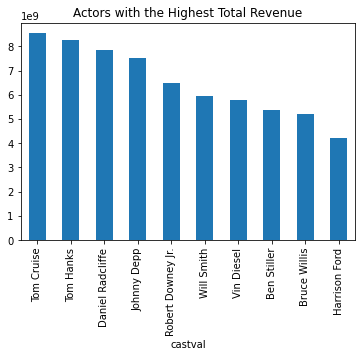

In [486]:
plt.title('Actors with the Highest Total Revenue')
merged_movie_data.groupby('castval')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

#### production companies with highest profitability

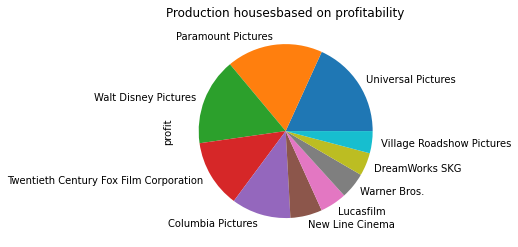

In [487]:
plt.title('Production housesbased on profitability')
merged_movie_data.groupby('production_companiesval')['profit'].sum().sort_values(ascending=False).head(10).plot(kind='pie')
plt.show()

#### Directors with highest movies

In [488]:
merged_movie_data['crewval'].value_counts()

Michael Curtiz      62
John Ford           55
Alfred Hitchcock    46
George Cukor        44
Woody Allen         44
                    ..
Pekka Lehto          1
Phil Tippett         1
Vito Trabucco        1
Fabrice Gobert       1
Chris Browne         1
Name: crewval, Length: 9950, dtype: int64

#### Successful directors based on profitability

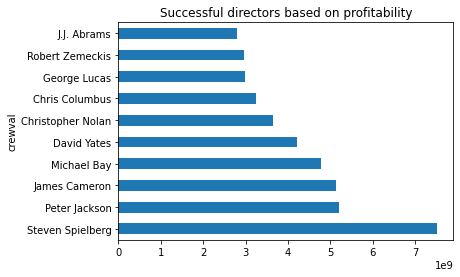

In [489]:
plt.title('Successful directors based on profitability')
merged_movie_data.groupby('crewval')['profit'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

### Users

#### Number of movies watched by each user

In [490]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [491]:
n_movies_each_user = df_ratings['userId'].value_counts()

In [492]:
n_movies_each_user.loc[n_movies_each_user.index == 1]

1    27
Name: userId, dtype: int64

#### Number of users who watched the same number of movies

In [493]:
n_movies_each_user.value_counts()

15      19289
16      10105
5        7324
17       7012
10       6795
        ...  
7515        1
3792        1
2001        1
1879        1
1535        1
Name: userId, Length: 2095, dtype: int64

#### Number of users who watched movies more than 1000

In [494]:
len(n_movies_each_user.loc[n_movies_each_user > 1000])

2502

#### Number of users who watched movies more than 5000

In [495]:
len(n_movies_each_user.loc[n_movies_each_user > 5000])

14

#### Number of users who watched movies less than 10

In [496]:
len(n_movies_each_user.loc[n_movies_each_user < 10])

36993

#### Total count for each ratings

In [497]:
ratings['rating'].value_counts()

4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: rating, dtype: int64

#### Average ratings given by each user

In [498]:
ratings.groupby('userId', as_index=False)['rating'].mean()

userId    rating
0            1  4.277778
1            2  3.318182
2            3  3.100000
3            4  3.500000
4            5  4.269231
...        ...       ...
270891  270892  3.640000
270892  270893  3.673684
270893  270894  2.516892
270894  270895  4.300000
270895  270896  3.980769

[270896 rows x 2 columns]

#### Number of users who watched same movies

In [499]:
rated_users_per_movie = df_ratings['movieId'].value_counts().rename_axis('movieId').reset_index(name='user_counts')

In [500]:
rated_users_per_movie

movieId  user_counts
0          356        91921
1          318        91082
2          296        87901
3          593        84078
4         2571        77960
...        ...          ...
45110   151011            1
45111   176257            1
45112   167416            1
45113   134633            1
45114   123324            1

[45115 rows x 2 columns]

#### Average ratings given for each movie

In [501]:
avg_movie_usr_rating=ratings.groupby('movieId', as_index=False)['rating'].mean()

#### merging with count of users voted

In [502]:
avg_movie_usr_rating=avg_movie_usr_rating.merge(rated_users_per_movie,on='movieId')

In [503]:
avg_movie_usr_rating

movieId    rating  user_counts
0            1  3.888157        66008
1            2  3.236953        26060
2            3  3.175550        15497
3            4  2.875713         2981
4            5  3.079565        15258
...        ...       ...          ...
45110   176267  4.000000            1
45111   176269  3.500000            1
45112   176271  5.000000            1
45113   176273  1.000000            1
45114   176275  3.000000            1

[45115 rows x 3 columns]

## User Movie Interaction

In [504]:
merged_data = pd.merge(merged_movie_data,avg_movie_usr_rating, left_on=['id'], right_on=['movieId']).drop(columns=['movieId'])

In [505]:
merged_data

budget      id    imdb_id original_language  popularity release_date  \
0     30000000     862  tt0114709                en   21.946943   1995-10-30   
1     65000000    8844  tt0113497                en   17.015539   1995-12-15   
2     60000000     949  tt0113277                en   17.924927   1995-12-15   
3     58000000     710  tt0113189                en   14.686036   1995-11-16   
4     98000000    1408  tt0112760                en    7.284477   1995-12-22   
...        ...     ...        ...               ...         ...          ...   
4958         0    3104  tt0061683                en    2.302582   1967-03-15   
4959    500000   40467  tt0082237                en    0.283443   1981-12-11   
4960         0   79927  tt0102691                en    9.015632   1991-06-21   
4961         0    5589  tt0232750                cs    0.375001   1968-06-07   
4962         0  111109  tt2028550                tl    0.178241   2011-11-17   

        revenue  runtime                       title  vote_average  ...  \
0     373554033     81.0                   Toy Story           7.7  ...   
1     262797249    104.0                     Jumanji           6.9  ...   
2     187436818    170.0                        Heat           7.7  ...   
3     352194034    130.0                   GoldenEye           6.6  ...   
4      10017322    119.0            Cutthroat Island           5.7  ...   
...         ...      ...                         ...           ...  ...   
4958          0     92.0  Frankenstein Created Woman           5.9  ...   
4959          0     93.0           Dawn of the Mummy           3.6  ...   
4960          0     96.0           The Pope Must Die           4.2  ...   
4961          0     73.0     Šíleně smutná princezna           6.1  ...   
4962          0    360.0         Century of Birthing           9.0  ...   

       production_companiesval   production_countriesval spoken_languagesval  \
0      Pixar Animation Studios  United States of America             English   
1             TriStar Pictures  United States of America             English   
2          Regency Enterprises  United States of America             English   
3               United Artists            United Kingdom             English   
4             Le Studio Canal+                    France             English   
...                        ...                       ...                 ...   
4958   Hammer Film Productions            United Kingdom             English   
4959              Harmony Gold                     Egypt             English   
4960        Channel Four Films            United Kingdom             English   
4961  Filmové Studio Barrandov            Czech Republic               Český   
4962               Sine Olivia               Philippines                       

                     castval           crewval    keywordsval release_year  \
0                  Tom Hanks     John Lasseter       jealousy         1995   
1             Robin Williams      Joe Johnston     board game         1995   
2                  Al Pacino      Michael Mann        robbery         1995   
3             Pierce Brosnan   Martin Campbell           cuba         1995   
4                Geena Davis      Renny Harlin  exotic island         1995   
...                      ...               ...            ...          ...   
4958           Peter Cushing    Terence Fisher   frankenstein         1967   
4959  Brenda Siemer Scheider      Frank Agrama          mummy         1981   
4960         Robbie Coltrane  Peter Richardson        vatican         1991   
4961      Helena Vondráčková     Bořivoj Zeman     fairy tale         1968   
4962            Angel Aquino          Lav Diaz         artist         2011   

         profit    rating  user_counts  
0     343554033  3.598930          374  
1     197797249  3.760163          123  
2     127436818  3.905544         2345  
3     294194034  2.740334         1319  
4     -87982678  3.710181        13888  
..

#### Making user rating obtained from user dataframe comparable to vote average

In [506]:
merged_data['rating']=merged_data['rating']*2

#### Top 10 user rated movies - comparing vote_average to user rating

In [507]:
merged_data[merged_data['user_counts'] > 10 ][['title','runtime', 'popularity','rating', 'vote_average','user_counts','vote_count']].sort_values('rating', ascending=False).head(10)

title  runtime  popularity    rating  vote_average  \
1040  The Million Dollar Hotel    122.0    4.938231  8.858029           5.9   
137       Sleepless in Seattle    105.0   10.234919  8.679622           6.5   
71          Once Were Warriors     99.0    4.025276  8.533061           7.6   
114                Hard Target     97.0    7.834351  8.510147           6.1   
2590            License to Wed     91.0    7.102076  8.461432           5.3   
4264               Five Dances     83.0    1.825600  8.435897           6.6   
733    The Thomas Crown Affair    102.0    9.444818  8.428785           6.9   
1943           Murder She Said     87.0    7.261845  8.426061           7.0   
1981           Cousin, Cousine     95.0    0.624726  8.405179           7.3   
172                   Dead Man    121.0    6.505272  8.401639           7.2   

      user_counts  vote_count  
1040        91082        76.0  
137         57070       630.0  
71          67662       106.0  
114         13994       237.0  
2590        60024       258.0  
4264          273        20.0  
733         30043        95.0  
1943        28280        31.0  
1981        20855         4.0  
172          7930       397.0

#### Correlation between column values

In [508]:
corr=merged_data.corr()

In [509]:
corr

budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.189077    0.523846  0.772917  0.241349   
id           -0.189077  1.000000   -0.327949 -0.176319 -0.196777   
popularity    0.523846 -0.327949    1.000000  0.573303  0.269905   
revenue       0.772917 -0.176319    0.573303  1.000000  0.222884   
runtime       0.241349 -0.196777    0.269905  0.222884  1.000000   
vote_average  0.079891 -0.326399    0.296965  0.137459  0.249756   
vote_count    0.623198 -0.172834    0.726836  0.789227  0.227980   
release_year  0.290947 -0.046801    0.262759  0.210921  0.171820   
profit        0.634390 -0.156714    0.537499  0.980813  0.197384   
rating        0.006309 -0.153935    0.043073  0.015210  0.016713   
user_counts   0.103740 -0.227969    0.159328  0.116325  0.068129   

              vote_average  vote_count  release_year    profit    rating  \
budget            0.079891    0.623198      0.290947  0.634390  0.006309   
id               -0.326399   -0.172834     -0.046801 -0.156714 -0.153935   
popularity        0.296965    0.726836      0.262759  0.537499  0.043073   
revenue           0.137459    0.789227      0.210921  0.980813  0.015210   
runtime           0.249756    0.227980      0.171820  0.197384  0.016713   
vote_average      1.000000    0.229679      0.045102  0.142919  0.077164   
vote_count        0.229679    1.000000      0.203107  0.770031  0.024772   
release_year      0.045102    0.203107      1.000000  0.167570 -0.017179   
profit            0.142919    0.770031      0.167570  1.000000  0.016592   
rating            0.077164    0.024772     -0.017179  0.016592  1.000000   
user_counts       0.127567    0.125899      0.029310  0.109843  0.220470   

              user_counts  
budget           0.103740  
id              -0.227969  
popularity       0.159328  
revenue          0.116325  
runtime          0.068129  
vote_average     0.127567  
vote_count       0.125899  
release_year     0.029310  
profit           0.109843  
rating           0.220470  
user_counts      1.000000

#### Correlation heatmap

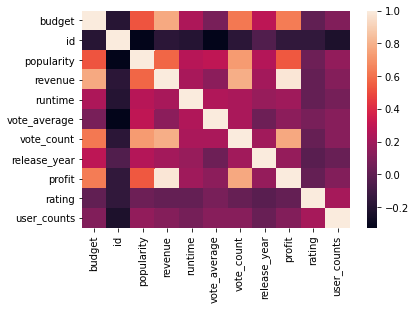

In [510]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### ========================================================================================================